Tutorial for Feature  Matching <br> Resource: https://huggingface.co/learn/computer-vision-course/en/unit1/feature-extraction/feature-matching

In [1]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt

(-0.5, 4607.5, 2591.5, -0.5)

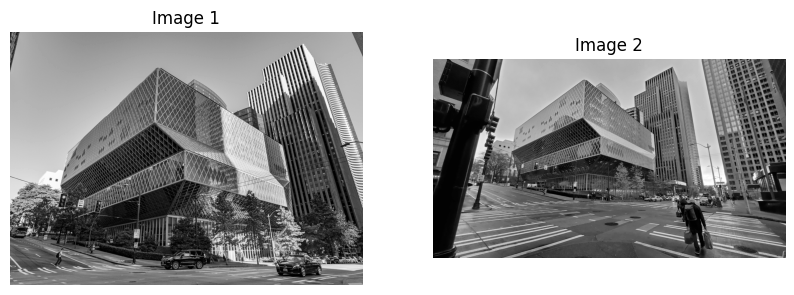

In [2]:
# Read the input images


# Get the image path
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

img1_path = os.path.join(project_root, "src", "data", "feature_matching", "seattle_central_library.jpg")
img2_path = os.path.join(project_root, "src", "data", "feature_matching", "seattle_central_library_2.jpg")

# Read the images
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the images
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2")
axes[1].axis("off")



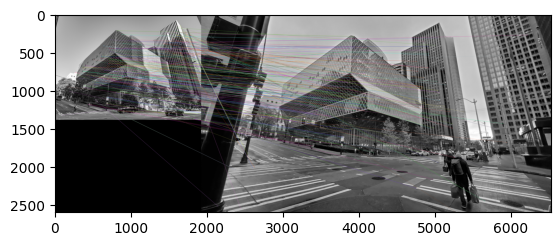

In [6]:
# Feature Matching using Brute Force Matching (BFMatcher) + SIFT Features

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract sift keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Initialize Brute Force Matcher
bf = cv2.BFMatcher()

# Apply K Nearest Nearest Neighbor to find matches, with No. of nearest nbrs : k = 2
matches = bf.knnMatch(des1, des2, k=2)

# Apply Ratio test to threshold the best matches
good_matches = []
THRESHOLD_RATIO_TEST = 0.75
for best_match, second_best_match in matches:
    if best_match.distance < THRESHOLD_RATIO_TEST * second_best_match.distance:
        good_matches.append([best_match])
        
# Draw the matches
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matches
plt.figure()
plt.imshow(img3)

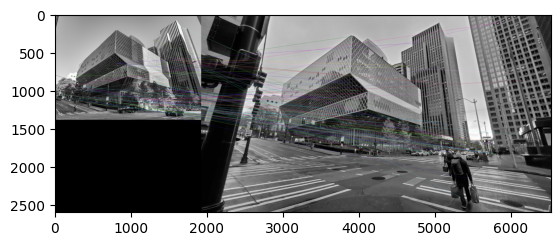

In [9]:
# Feature Matching with ORB Descriptors + Brute Force Matching + Hamming Distance

# ORB: Oriented FAST and Rotated BRIEF
# - efficient and fast descriptor, good for real time applications
# - scale and rotation invariant
# - binary descriptor , good for mobile and embedded systems
# - used in object detection, tracking, image stitching, SLAM
# - How it works?
#     1. Apply FAST (Features from Accelerated Segment Test) to find keypoints in image
#     2. Compute keypoints' orientation using intensity centroid method
#     3. Apply BRIEF (Binary Robust Independent Elementary Features) to generate descriptor
# - 256 bit binary descriptor

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort the matches in the order of their distance
matches_sorted = sorted(matches, key=lambda x: x.distance)

# Draw first n matches
n = 100
img_orb_bf = cv2.drawMatches(img1, kp1, img2, kp2, matches[:n], None,\
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image
plt.figure()
plt.imshow(img_orb_bf)
